# Imports

In [1]:
import json
from pandas.io.json import json_normalize

import os
import re
import string
import itertools

import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns

import jiwer
from jiwer import wer

import pickle

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_colwidth', -1)

In [2]:
os.chdir('/Users/traceyetheridge/Documents/Data_Science/Text Alignment/Git_Shared/Methods-for-Improvement-of-Automated-Speech-Recognition-Transcripts')

In [3]:
# own functions, placed in functions.py.
from functions import *

# Explore file structure

In [4]:
os.getcwd()

'/Users/traceyetheridge/Documents/Data_Science/Text Alignment/Git_Shared/Methods-for-Improvement-of-Automated-Speech-Recognition-Transcripts'

In [6]:
# What files do we have, how many? #160
path = '../data_new_200127'
files = get_file_names(path)
#len(files)
files

['amazon__8000_8__switchboard_segmented.json',
 'amazon__ami_segmented_h.json',
 'amazon__ami_segmented_mix.json',
 'amazon__commonvoice.json',
 'amazon__librispeech_clean.json',
 'amazon__librispeech_other.json',
 'amazon__rt_segmented_h.json',
 'amazon__rt_segmented_hsum.json',
 'amazon__st.json',
 'amazon__tedlium_segmented.json',
 'amazon__tedlium_unsegmented.json',
 'amazon__timit.json',
 'amazon__voxforge.json',
 'amazon_enus__8000_8__switchboard_segmented.json',
 'amazon_enus__ami_segmented_h.json',
 'amazon_enus__ami_segmented_mix.json',
 'amazon_enus__commonvoice.json',
 'amazon_enus__librispeech_clean.json',
 'amazon_enus__librispeech_other.json',
 'amazon_enus__rt_segmented_h.json',
 'amazon_enus__rt_segmented_hsum.json',
 'amazon_enus__st.json',
 'amazon_enus__tedlium_segmented.json',
 'amazon_enus__tedlium_unsegmented.json',
 'amazon_enus__timit.json',
 'amazon_enus__voxforge.json',
 'google_lrr_v1p1beta1_default__ami_segmented_h.json',
 'google_lrr_v1p1beta1_default__ami_

In [7]:
# What machines do we have, how many? #7
machines = get_machine_ids (files)
print(len(machines))
machines

7


{'amazon', 'google', 'ibm', 'kaldi', 'mozilla', 'ms', 'sphinx4'}

In [8]:
# What configurations do we have, how many? #26.
configurations = get_configurations (files)
print(len(configurations))
configurations

26


{'amazon',
 'amazon__8000_8',
 'amazon_enus',
 'amazon_enus__8000_8',
 'google_lrr_v1p1beta1_default',
 'google_lrr_v1p1beta1_default_enus',
 'google_lrr_v1p1beta1_phone_call_enus',
 'google_lrr_v1p1beta1_video_enus',
 'ibm__am_bb_generic__lm_bb_generic',
 'ibm__am_enus_bb_generic__lm_enus_bb_generic',
 'ibm__am_enus_nb_generic__lm_enus_nb_generic__8000_8',
 'ibm__am_nb_generic__lm_nb_generic__8000_8',
 'kaldi_aspire',
 'kaldi_aspire__8000_16',
 'kaldi_librispeech',
 'kaldi_librispeech__8000_8',
 'mozilla_deepspeech__am_generic_mm__lm_generic',
 'mozilla_deepspeech__am_generic_rounded_mm__lm_generic',
 'ms_azure_continuous__am_generic__lm_generic',
 'ms_azure_continuous__am_generic__lm_generic__8000_8',
 'ms_azure_continuous__am_generic__lm_generic__enus',
 'ms_azure_continuous__am_generic__lm_generic__enus__8000_8',
 'sphinx4__am_generic_c__lm_generic',
 'sphinx4__am_generic_c__lm_generic__8000_8',
 'sphinx4__am_generic_ptm__lm_generic_p',
 'sphinx4__am_generic_ptm__lm_generic_p__8000

In [9]:
# What corpora do we have, how many?
corpora = get_corpora (files)
print(len(corpora))
corpora

13


{'ami_segmented_h',
 'ami_segmented_mix',
 'commonvoice',
 'librispeech_clean',
 'librispeech_other',
 'rt_segmented_h',
 'rt_segmented_hsum',
 'st',
 'switchboard_segmented',
 'tedlium_segmented',
 'tedlium_unsegmented',
 'timit',
 'voxforge'}

In [10]:
# files for a certain corpora 
corpora = 'tedlium'
print('files in '+ corpora +':')
pprint([file for file in files if corpora in file])

# files for a certain machine 
machine = 'google'
print('\nfiles produced by machine '+ machine +':')
pprint([file for file in files if machine in file])

files in tedlium:
['amazon__tedlium_segmented.json',
 'amazon__tedlium_unsegmented.json',
 'amazon_enus__tedlium_segmented.json',
 'amazon_enus__tedlium_unsegmented.json',
 'google_lrr_v1p1beta1_default__tedlium_segmented.json',
 'google_lrr_v1p1beta1_default__tedlium_unsegmented.json',
 'google_lrr_v1p1beta1_default_enus__tedlium_segmented.json',
 'google_lrr_v1p1beta1_default_enus__tedlium_unsegmented.json',
 'google_lrr_v1p1beta1_phone_call_enus__tedlium_segmented.json',
 'google_lrr_v1p1beta1_phone_call_enus__tedlium_unsegmented.json',
 'google_lrr_v1p1beta1_video_enus__tedlium_segmented.json',
 'google_lrr_v1p1beta1_video_enus__tedlium_unsegmented.json',
 'ibm__am_bb_generic__lm_bb_generic__tedlium_segmented.json',
 'ibm__am_bb_generic__lm_bb_generic__tedlium_unsegmented.json',
 'ibm__am_enus_bb_generic__lm_enus_bb_generic__tedlium_segmented.json',
 'ibm__am_enus_bb_generic__lm_enus_bb_generic__tedlium_unsegmented.json',
 'kaldi_aspire__tedlium_segmented.json',
 'kaldi_aspire__ted

# Explore JSON structure

In [12]:
# How does the data in a file look like?
path = '../data_new_200127'
filename = 'amazon__8000_8__switchboard_segmented'
file = path + '/' + filename + '.json'
if file:
    with open(file, 'r') as f:
        data = json.load(f)

In [13]:
data.keys()

dict_keys(['corpus', 'system', 'dataset'])

In [14]:
data['corpus']

{'identifier': 'switchboard_segmented',
 'license': '',
 'documentation_link': '',
 'download_link': '',
 'cost': '',
 'incomplete_utterances_removed_%': 0.0,
 'missing_corpus_data': {'empty_reference': 14709, 'missing_accent': 264333},
 'original_reference_segmentation': None,
 'original_audio_segmentation': None}

In [15]:
data['system']

{'identifier': 'amazon__8000_8',
 'model': 'Amazon default model (8 kHz, 8 bit)',
 'language_code': 'en-US'}

In [16]:
data['dataset'].keys()

dict_keys(['language', 'speaking_style', 'num_utterances', 'total_duration', 'average_audio_duration', 'num_speaker_noise_references', '%_overlapping_utterances', 'max_num_overlapping_utterances', 'num_utterances_containing_non_lexical_sounds', 'num_utterances_containing_only_non_lexical_sounds', 'average_speaking_rate', 'recording_devices', 'acoustic_environments', 'avg_wer', 'overlapping_speech', 'utterances_per_gender', 'utterances_per_dialect', 'utterances_per_accent', 'num_speakers', 'max_num_utterances_per_speaker', 'min_num_utterances_per_speaker', 'avg_num_utterances_per_speaker', 'utterances'])

In [17]:
# What are the keys
print(len(data['dataset']['utterances']))
list(data['dataset']['utterances'][0].keys())

4105


['identifier',
 'speaker_id',
 'dialect',
 'accent',
 'gender',
 'reference',
 'audio',
 'recording',
 'overlappings',
 'speaker_noise_utterance',
 'speaking_rate',
 'hypothesis',
 'scoring',
 'extra']

In [18]:
# How does a record look like?
data['dataset']['utterances'][5]

{'identifier': 'sw3112B-ms98-a-0063',
 'speaker_id': 1304,
 'dialect': 'en-US',
 'accent': None,
 'gender': 'male',
 'reference': {'text': "i i don't listen to in nearly enough it's the same sort of thing there's so much music that i recognize but don't who is yeah who is the composer",
  'original_text': "i- i don't listen to in nearly enough it's the same sort of thing there's so much music that i recognize but don't who is yeah who is the composer",
  'only_non_lexical_sounds': False,
  'start_time': 400.872125,
  'end_time': 408.299125},
 'audio': {'trimmed_audio': '/home/fg/asr/cache/audio/763d80f40264dd54e285160efccd7121__channel_2__converted_8000_8_1__trimmed_400872_408299.wav',
  'audio_file_path': '/home/fg/asr/corpora/switchboard/swb1_d2/data/sw03112.sph',
  'duration': 7.427,
  'samplerate': 8000,
  'bitdepth': 8,
  'channels': 1,
  'encoding': 'u-law',
  'num_samples': 59416},
 'recording': {'acoustic_environment': None, 'recording_device': None},
 'overlappings': 0.0,
 'sp

In [19]:
#print the data that has a certain identifier
from pprint import pprint
for element in range(len(data['dataset']['utterances'])):
    if (data['dataset']['utterances'][element]['identifier']=='sw2061A-ms98-a-0123'):
        pprint(data['dataset']['utterances'][element])
        break

{'accent': None,
 'audio': {'audio_file_path': '/home/fg/asr/corpora/switchboard/swb1_d1/data/sw02061.sph',
           'bitdepth': 8,
           'channels': 1,
           'duration': 4.74575,
           'encoding': 'u-law',
           'num_samples': 37966,
           'samplerate': 8000,
           'trimmed_audio': '/home/fg/asr/cache/audio/9100eabe48ed41abc671fe09027ecc67__channel_1__converted_8000_8_1__trimmed_445535_450281.wav'},
 'dialect': 'en-US',
 'extra': {'age': None,
           'date_of_birth': None,
           'education': None,
           'mother_tongue': None,
           'network': None,
           'primary_school': None,
           'region': None},
 'gender': 'male',
 'hypothesis': {'confidence': None,
                'original_transcript': 'Yeah, because see, what happens is '
                                       'they have a good backup policy and '
                                       'anybody can fix it.',
                'text': 'yeah because see what happens is t

# Create dataframe with raw data

In [21]:
# Note: Takes ~30 minutes
path = '../data_new_200127/'
files = get_file_names(path)
print('number of files: ', len(files))

df = create_df_raw(path = path, files = files)

number of files:  208
amazon__8000_8__switchboard_segmented.json


/Users/traceyetheridge/Documents/Data_Science/Text Alignment/Git_Shared/Methods-for-Improvement-of-Automated-Speech-Recognition-Transcripts/functions.py:158: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_intermediate = json_normalize(data['dataset']['utterances'], max_level=3)


amazon__ami_segmented_h.json
amazon__ami_segmented_mix.json
amazon__commonvoice.json
amazon__librispeech_clean.json
amazon__librispeech_other.json
amazon__rt_segmented_h.json
amazon__rt_segmented_hsum.json
amazon__st.json
amazon__tedlium_segmented.json
amazon__tedlium_unsegmented.json
amazon__timit.json
amazon__voxforge.json
amazon_enus__8000_8__switchboard_segmented.json
amazon_enus__ami_segmented_h.json
amazon_enus__ami_segmented_mix.json
amazon_enus__commonvoice.json
amazon_enus__librispeech_clean.json
amazon_enus__librispeech_other.json
amazon_enus__rt_segmented_h.json
amazon_enus__rt_segmented_hsum.json
amazon_enus__st.json
amazon_enus__tedlium_segmented.json
amazon_enus__tedlium_unsegmented.json
amazon_enus__timit.json
amazon_enus__voxforge.json
google_lrr_v1p1beta1_default__ami_segmented_h.json
google_lrr_v1p1beta1_default__ami_segmented_mix.json
google_lrr_v1p1beta1_default__commonvoice.json
google_lrr_v1p1beta1_default__librispeech_clean.json
google_lrr_v1p1beta1_default__libr

In [28]:
# save data frame as a pickle object
df.to_pickle('../data/df_raw_new.pkl')

# Read and explore raw data frame
Numbers should match the file exploration

In [30]:
df = pd.read_pickle("../data/df_raw_new.pkl")

In [31]:
pd.set_option('display.max_columns', 500)
df.head(3)

,identifier,speaker_id,dialect,accent,gender,overlappings,speaker_noise_utterance,speaking_rate,reference.text,reference.original_text,reference.only_non_lexical_sounds,reference.start_time,reference.end_time,audio.trimmed_audio,audio.audio_file_path,audio.duration,audio.samplerate,audio.bitdepth,audio.channels,audio.encoding,audio.num_samples,recording.acoustic_environment,recording.recording_device,hypothesis.text,hypothesis.original_transcript,hypothesis.confidence,hypothesis.transcription_language,hypothesis.words,scoring.wer,scoring.alignment.SUBSTITUTION.abs,scoring.alignment.SUBSTITUTION.rel,scoring.alignment.DELETION.abs,scoring.alignment.DELETION.rel,scoring.alignment.INSERTION.abs,scoring.alignment.INSERTION.rel,scoring.alignment.CORRECT.abs,scoring.alignment.CORRECT.rel,scoring.alignment.mutations,extra.age,extra.network,extra.region,extra.mother_tongue,extra.date_of_birth,extra.primary_school,extra.education,corpus,machine,configuration,file
0,sw3647B-ms98-a-0014,1437,en-US,None,female,1.0,False,40.451711,yeah,yeah,True,30.7905,32.2737,/home/fg/asr/cache/audio/388d41554d486170bdd08...,/home/fg/asr/corpora/switchboard/swb1_d1/data/...,1.483250,8000,8,1,u-law,11866,None,None,yeah,Yeah.,None,en-US,"[{'start_time': 0.29, 'end_time': 1.08, 'extra...",0.0,0,0.0,0,0.0,0,0.0,1,1.0,"[[CORRECT, yeah, yeah]]",None,None,None,None,None,None,None,switchboard_segmented,amazon,amazon__8000_8,amazon__8000_8__switchboard_segmented.json
1,sw2061A-ms98-a-0123,1167,en-US,None,male,1.0,False,214.929147,yeah because see what happens is they have a g...,yeah because see what happens is they have a g...,False,445.535,450.281,/home/fg/asr/cache/audio/9100eabe48ed41abc671f...,/home/fg/asr/corpora/switchboard/swb1_d1/data/...,4.745750,8000,8,1,u-law,37966,None,None,yeah because see what happens is they have a g...,"Yeah, because see, what happens is they have a...",None,en-US,"[{'start_time': 0.04, 'end_time': 0.41, 'extra...",0.0,0,0.0,0,0.0,0,0.0,17,1.0,"[[CORRECT, yeah, yeah], [CORRECT, because, bec...",None,None,None,None,None,None,None,switchboard_segmented,amazon,amazon__8000_8,amazon__8000_8__switchboard_segmented.json
2,sw2924A-ms98-a-0050,1028,en-US,None,male,1.0,False,33.405247,,[laughter],False,214.368,216.164,/home/fg/asr/cache/audio/e30848a81b7c3a2bc0dc1...,/home/fg/asr/corpora/switchboard/swb1_d1/data/...,1.796125,8000,8,1,u-law,14369,None,None,mhm,mhm.,None,en-US,"[{'start_time': 0.84, 'end_time': 1.32, 'extra...",1.0,0,0.0,0,0.0,1,1.0,0,0.0,"[[INSERTION, , mhm]]",None,None,None,None,None,None,None,switchboard_segmented,amazon,amazon__8000_8,amazon__8000_8__switchboard_segmented.json


In [32]:
# numbers should match initial exploration
print('dimensions:', df.shape)
print('files:', df['file'].nunique())
print('machines:', df['machine'].nunique())
print('corpora:', df['corpus'].nunique())
print('configurations:', df['configuration'].nunique())

dimensions: (665328, 49)
files: 208
machines: 7
corpora: 13
configurations: 26


In [33]:
# How many rows for each corpus?
print('sentences in corpus:')
df['corpus'].value_counts()

sentences in corpus:


rt_segmented_hsum        85184
rt_segmented_h           85184
ami_segmented_h          73008
ami_segmented_mix        72256
switchboard_segmented    65680
commonvoice              63920
librispeech_other        47024
voxforge                 46864
librispeech_clean        41920
st                       38752
timit                    26880
tedlium_segmented        18480
tedlium_unsegmented        176
Name: corpus, dtype: int64

### Data volume per configuration, per corpora

In [34]:
pd.crosstab(df['configuration'], df['corpus'], dropna=False).sort_values(['switchboard_segmented', 'st'])

corpus,ami_segmented_h,ami_segmented_mix,commonvoice,librispeech_clean,librispeech_other,rt_segmented_h,rt_segmented_hsum,st,switchboard_segmented,tedlium_segmented,tedlium_unsegmented,timit,voxforge
configuration,,,,,,,,,,,,,
amazon,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929
amazon_enus,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929
ibm__am_bb_generic__lm_bb_generic,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929
ibm__am_enus_bb_generic__lm_enus_bb_generic,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929
kaldi_aspire,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929
kaldi_librispeech,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929
ms_azure_continuous__am_generic__lm_generic,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929
ms_azure_continuous__am_generic__lm_generic__enus,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929
sphinx4__am_generic_c__lm_generic,4563,4516,3995,2620,2939,5324,5324,2422,0,1155,11,1680,2929


### CHECK: are there empty reference texts?

In [36]:
cols = ['file', 'machine', 'configuration', 'corpus', 'identifier', 'speaker_id', 'reference.text', 'hypothesis.text']
check_empty_reference = df[(df['reference.text'] == "") | (df['reference.text'] == " ")][cols]
check_empty_reference.to_csv('../data/check_empty_reference_text.csv')
print(check_empty_reference.shape)
print('empty reference rows per corpus:')
check_empty_reference['file'].value_counts()

(25536, 8)
empty reference rows per corpus:


ibm__am_enus_bb_generic__lm_enus_bb_generic__ami_segmented_h.json        498
ms_azure_continuous__am_generic__lm_generic__ami_segmented_h.json        498
sphinx4__am_generic_ptm__lm_generic_p__ami_segmented_h.json              498
google_lrr_v1p1beta1_default__ami_segmented_h.json                       498
google_lrr_v1p1beta1_video_enus__ami_segmented_h.json                    498
                                                                        ... 
ibm__am_enus_bb_generic__lm_enus_bb_generic__rt_segmented_h.json         185
google_lrr_v1p1beta1_default_enus__rt_segmented_hsum.json                185
amazon__rt_segmented_h.json                                              185
mozilla_deepspeech__am_generic_mm__lm_generic__rt_segmented_hsum.json    185
sphinx4__am_generic_c__lm_generic__rt_segmented_hsum.json                185
Name: file, Length: 80, dtype: int64

### CHECK: are there empty hypothesis texts but not reference texts?
 - yes
 - appears to be mostly 1 word reference texts, yeah, no mmm, okay, etc, with the exception of Swtichboard which has longer texts with no reference and voxforge which are capitalised reference texts.

In [38]:
cols = ['file', 'machine', 'configuration', 'corpus', 'identifier', 'speaker_id', 'reference.text', 'hypothesis.text']
check_empty_hyp = df[((df['hypothesis.text'] == "") | (df['hypothesis.text'] == " ")) & (df['reference.text'] != " ") & (df['reference.text'] != "")][cols]
check_empty_hyp.to_csv('../data/check_empty_hypothesis_text.csv')
print(check_empty_hyp.shape)
check_empty_hyp['corpus'].value_counts()
#check_empty_hyp['reference.text'].value_counts()

(63617, 8)


rt_segmented_hsum        14617
switchboard_segmented    14345
ami_segmented_mix        11330
rt_segmented_h           11298
ami_segmented_h          10807
voxforge                   530
commonvoice                440
tedlium_segmented          112
librispeech_other          104
librispeech_clean           23
st                           6
timit                        5
Name: corpus, dtype: int64

# Exploratory: Compare mean WER per configuration across corpora

In [39]:
# mean WER per corpus
mean_wer_corpus = df.groupby(['corpus']) \
       .agg(count=('scoring.wer', 'size'), mean_wer=('scoring.wer', 'mean')) \
       .reset_index()
mean_wer_corpus.sort_values('mean_wer')

,corpus,count,mean_wer
7,st,38752,0.112309
3,librispeech_clean,41920,0.141679
11,timit,26880,0.155539
12,voxforge,46864,0.170582
10,tedlium_unsegmented,176,0.180462
9,tedlium_segmented,18480,0.201411
2,commonvoice,63920,0.246004
4,librispeech_other,47024,0.302754
8,switchboard_segmented,65680,0.487132
5,rt_segmented_h,85184,0.555681


In [40]:
# mean WER per configuration
mean_wer_configuration = df.groupby(['configuration']) \
       .agg(count=('scoring.wer', 'size'), mean_wer=('scoring.wer', 'mean')) \
       .reset_index()
mean_wer_configuration.sort_values('mean_wer')

,configuration,count,mean_wer
21,ms_azure_continuous__am_generic__lm_generic__e...,4105,0.232414
19,ms_azure_continuous__am_generic__lm_generic__8...,4105,0.232414
1,amazon__8000_8,4105,0.235780
3,amazon_enus__8000_8,4105,0.235780
7,google_lrr_v1p1beta1_video_enus,41583,0.337935
20,ms_azure_continuous__am_generic__lm_generic__enus,37478,0.359241
18,ms_azure_continuous__am_generic__lm_generic,37478,0.360604
13,kaldi_aspire__8000_16,4105,0.366957
2,amazon_enus,37478,0.385187
0,amazon,37478,0.385424


In [41]:
# mean WER per machine
mean_wer_machine = df.groupby(['machine']) \
       .agg(count=('scoring.wer', 'size'), mean_wer=('scoring.wer', 'mean')) \
       .reset_index()
mean_wer_machine.sort_values('mean_wer')

,machine,count,mean_wer
5,ms,83166,0.347335
0,amazon,83166,0.370545
1,google,166332,0.439751
2,ibm,83166,0.450799
4,mozilla,83166,0.512316
3,kaldi,83166,0.567403
6,sphinx4,83166,0.743972


## WER and volume per corpus

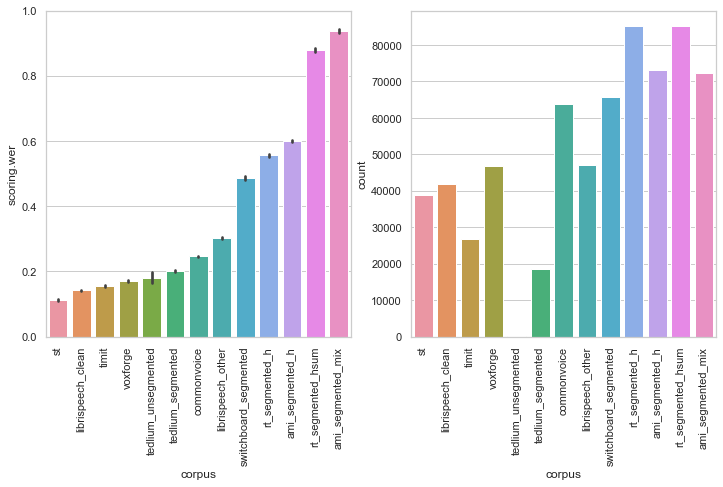

In [155]:
### Corpus volume and mean wer
mean_wer_corpus = df.groupby(['corpus']) \
       .agg(count=('scoring.wer', 'size'), mean_wer=('scoring.wer', 'mean')) \
       .reset_index()
order = mean_wer_corpus.sort_values('mean_wer')['corpus']

sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2)
ax1 = sns.barplot(x="corpus", y="scoring.wer", data=df, estimator=mean, order = order, ax=ax1)
ax1.set_ylim(0, 1)
#ax1.set_xticks(xlabels, Rotation=90)
ax1.tick_params(axis='x', rotation=90)

sns.countplot(x="corpus", data=df, order = order, ax=ax2)
ax2.tick_params(axis='x', rotation=90)
plt.show()

## Boxplots - WER per corpus and configuration

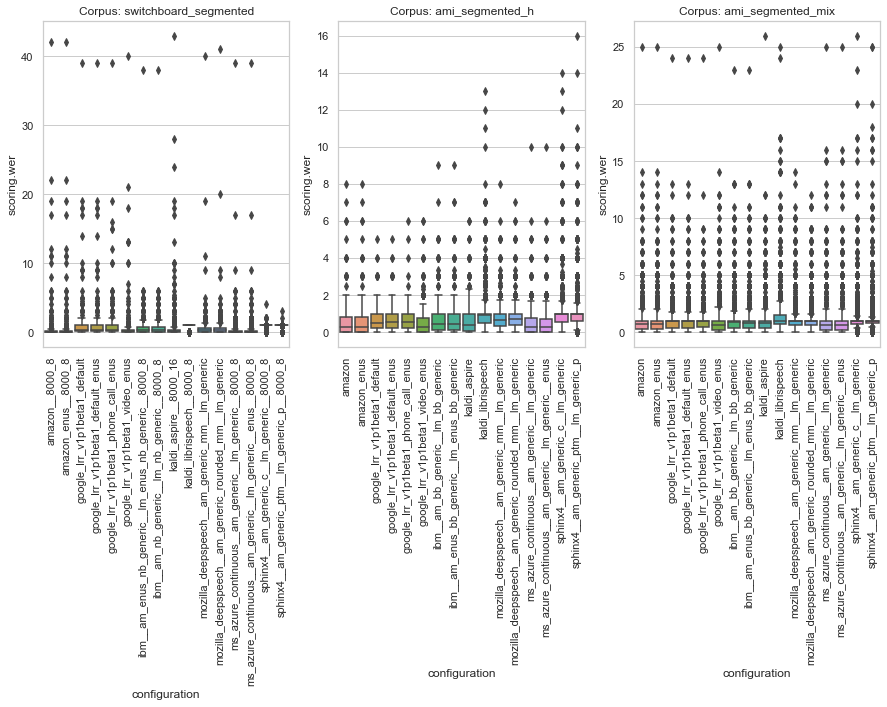

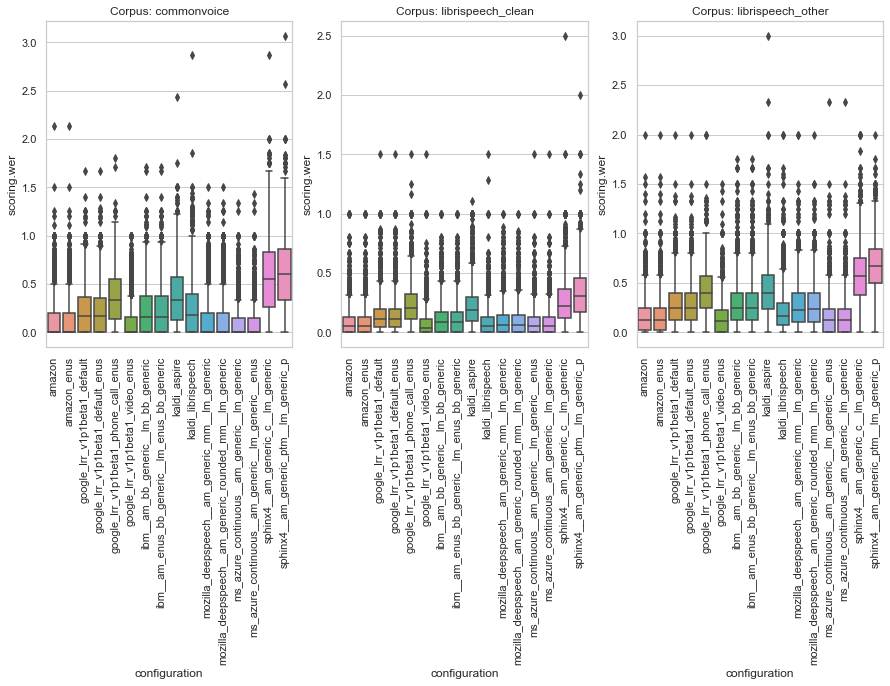

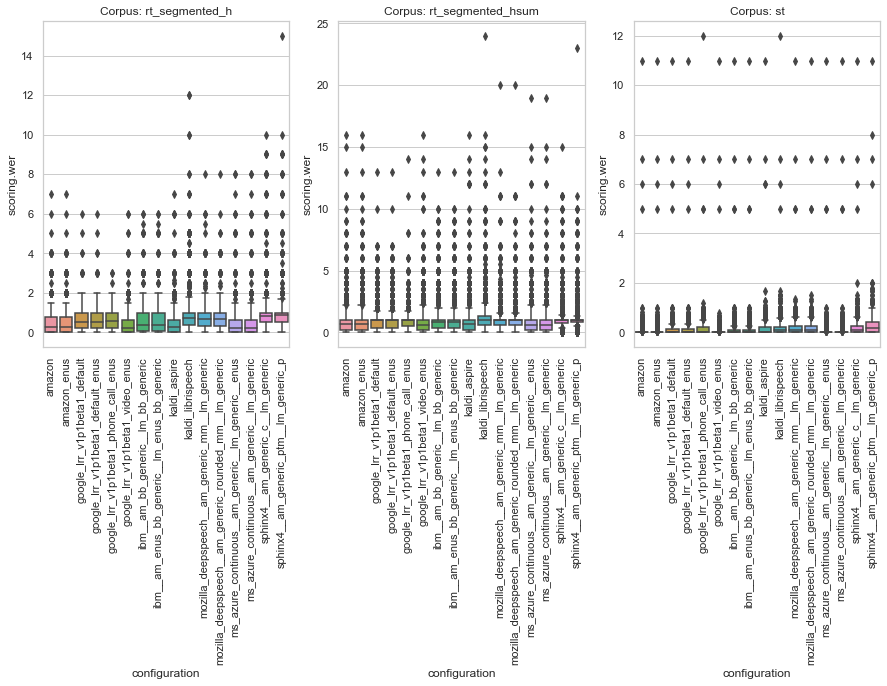

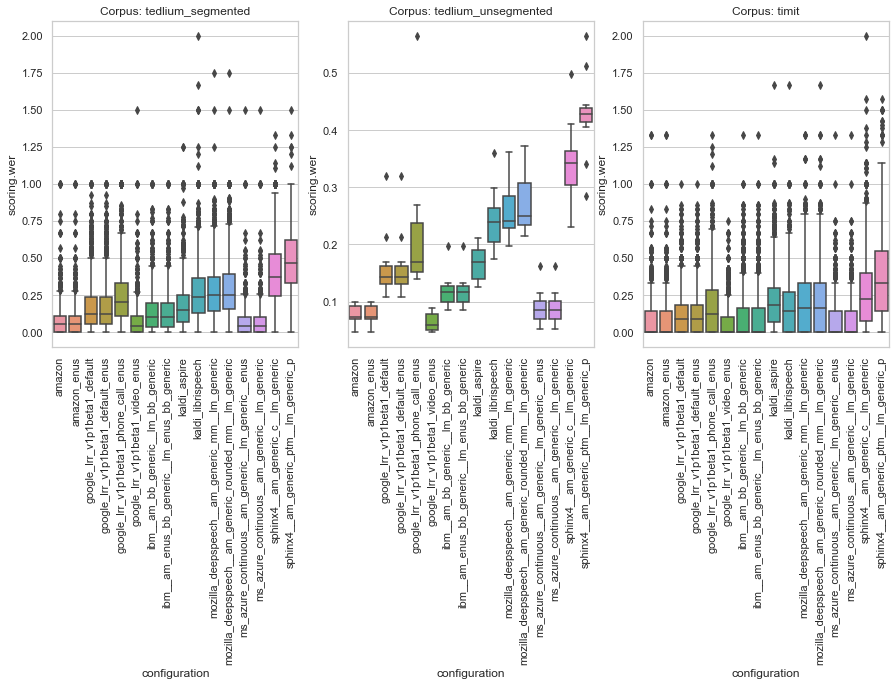

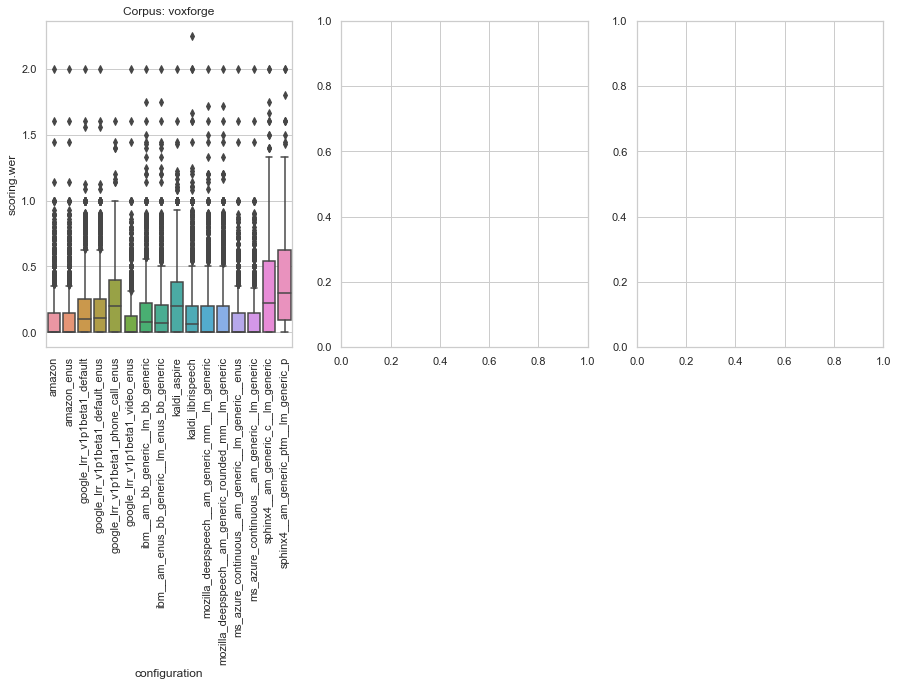

In [156]:
sns.set(style="whitegrid")
corpus = df['corpus'].unique()

plot_count = 0
for element in corpus:
    data = df[df['corpus'] == element]
    if plot_count % 3 == 0:
        ax_count = 0
        fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=3)
        ax = sns.boxplot(x="configuration", y="scoring.wer", data=data, ax=axes[ax_count])
        ax.set_title("Corpus: " + element)
        ax.tick_params(axis='x', rotation=90)
        plot_count += 1
        ax_count += 1
    else:
        ax = sns.boxplot(x="configuration", y="scoring.wer", data=data, ax=axes[ax_count])
        ax.set_title("Corpus: " + element)
        ax.tick_params(axis='x', rotation=90)
        plot_count += 1
        ax_count += 1

In [157]:
# Export results - mean wer and volume per corpus and configuration
mean_wer_agg = df.groupby(['corpus','configuration']) \
       .agg(count=('scoring.wer', 'size'), mean_wer=('scoring.wer', 'mean')) \
       .reset_index()
mean_wer_agg = mean_wer_agg.sort_values('mean_wer')
mean_wer_agg.to_csv('../data/mean_wer_on_raw_data.csv')

## Bar plots - WER per corpus and configuration

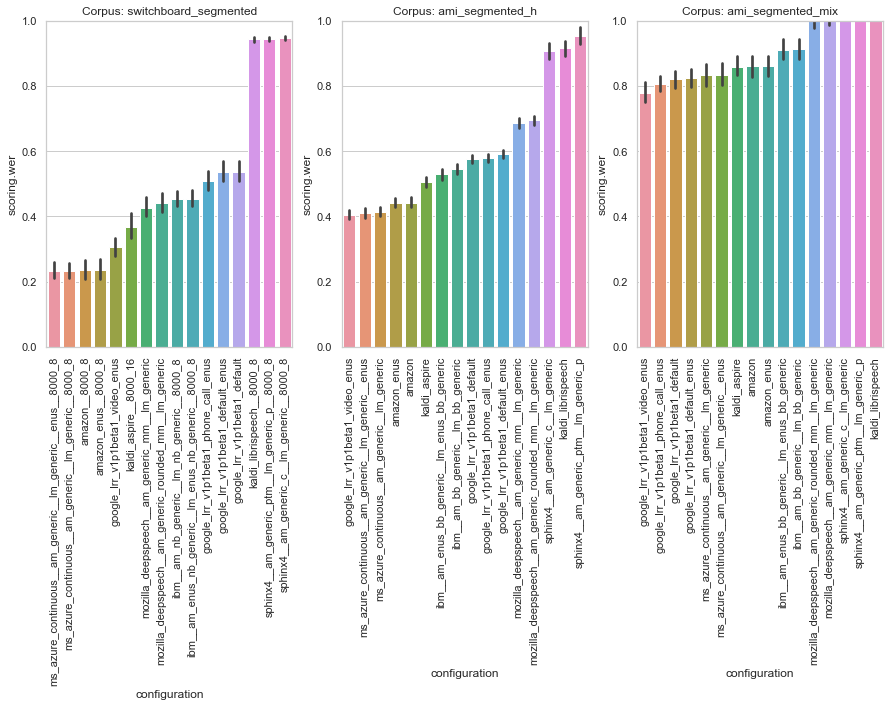

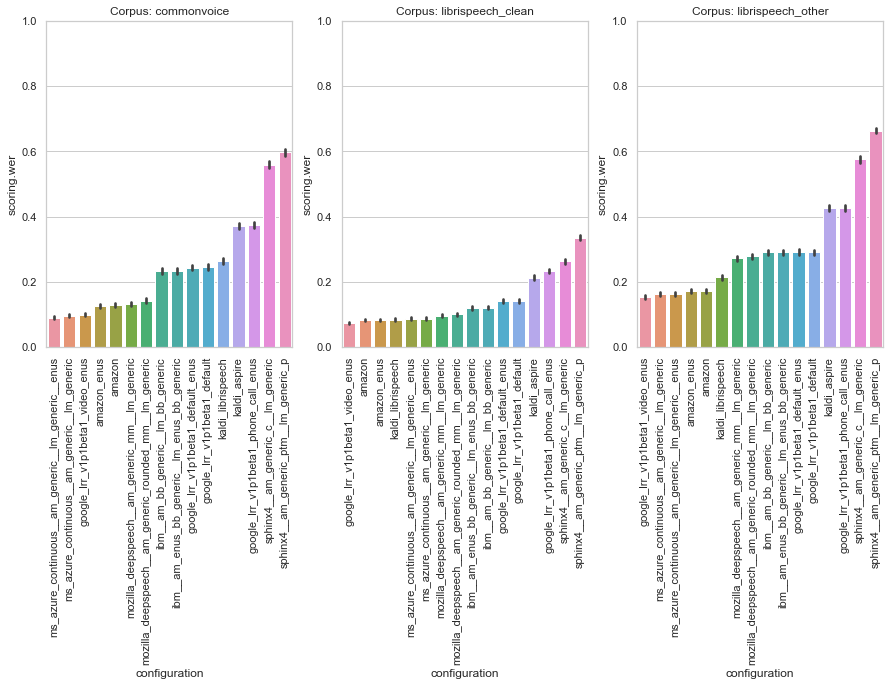

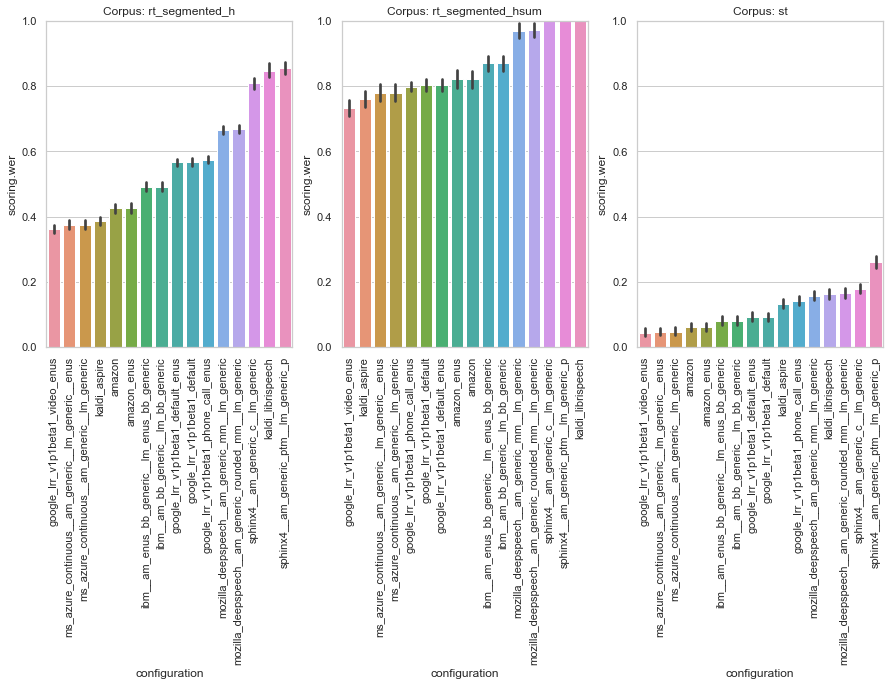

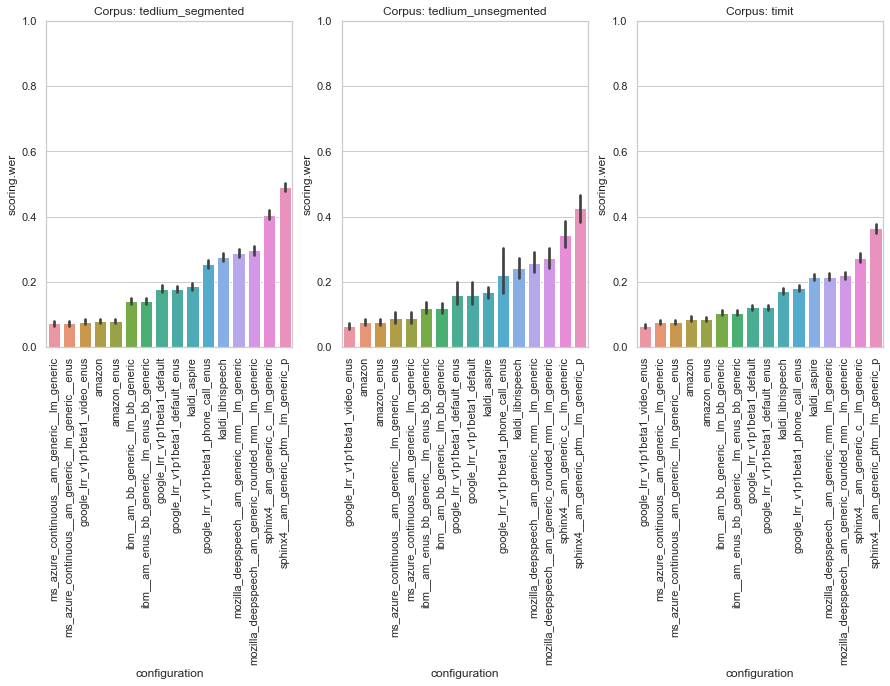

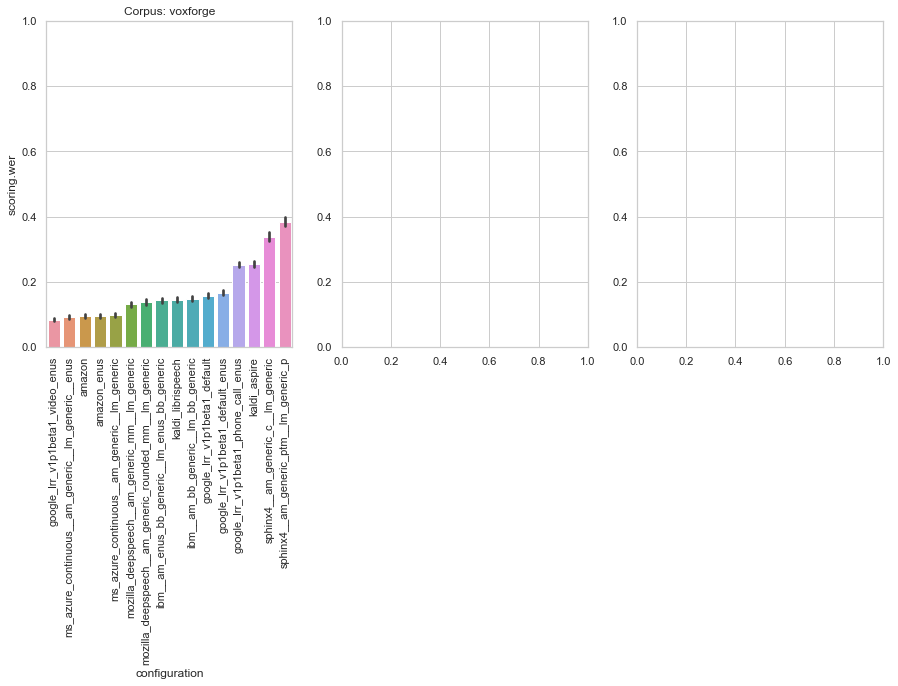

In [158]:
corpus = df['corpus'].unique()

plot_count = 0
for element in corpus:
    order = mean_wer_agg[mean_wer_agg['corpus'] == element]['configuration']
    data = df[df['corpus']==element]
    if plot_count % 3 == 0:
        ax_count = 0
        fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=3)
        ax = sns.barplot(x="configuration", y="scoring.wer", data=data, estimator = mean, order = order, ax=axes[ax_count])
        ax.set_title("Corpus: " + element)
        ax.set_ylim(0, 1)
        ax.tick_params(axis='x', rotation=90)
        plot_count += 1
        ax_count += 1
    else:
        ax = sns.barplot(x="configuration", y="scoring.wer", data=data, estimator = mean, order = order, ax=axes[ax_count])
        ax.set_title("Corpus: " + element)
        ax.set_ylim(0, 1)
        ax.tick_params(axis='x', rotation=90)
        plot_count += 1
        ax_count += 1

In [159]:
# how come we have such high WER for switchboard?
# reason: ref very short and hyp very long
df[df['corpus']=='switchboard_segmented'][['identifier', 'file', 'reference.text', 'hypothesis.text', 'scoring.wer']].sort_values(['scoring.wer'], ascending = False)

,identifier,file,reference.text,hypothesis.text,scoring.wer
2880,sw2165A-ms98-a-0049,kaldi_aspire__8000_16__switchboard_segmented.json,yeah,yeah and it's funny because people call thing...,43.0
2880,sw2165A-ms98-a-0049,amazon__8000_8__switchboard_segmented.json,yeah,yeah and it's funny because people call things...,42.0
2880,sw2165A-ms98-a-0049,amazon_enus__8000_8__switchboard_segmented.json,yeah,yeah and it's funny because people call things...,42.0
2880,sw2165A-ms98-a-0049,mozilla_deepspeech__am_generic_rounded_mm__lm_...,yeah,it yeah and it's funny because people call thi...,41.0
2880,sw2165A-ms98-a-0049,google_lrr_v1p1beta1_video_enus__switchboard_s...,yeah,yeah and it's funny because people call things...,40.0
...,...,...,...,...,...
1391,sw2869B-ms98-a-0030,kaldi_aspire__8000_16__switchboard_segmented.json,which is understandable i mean i'd go where i ...,which is understandable i mean i'd go where i ...,0.0
1383,sw4336B-ms98-a-0006,kaldi_aspire__8000_16__switchboard_segmented.json,yeah,yeah,0.0
1381,sw3512A-ms98-a-0035,kaldi_aspire__8000_16__switchboard_segmented.json,right,right,0.0
1380,sw2122B-ms98-a-0143,kaldi_aspire__8000_16__switchboard_segmented.json,okay,okay,0.0


## Examine the distribution of WER per configuration
- different configurations have different variations of mean WER
- reexamine the distribution after cleaning

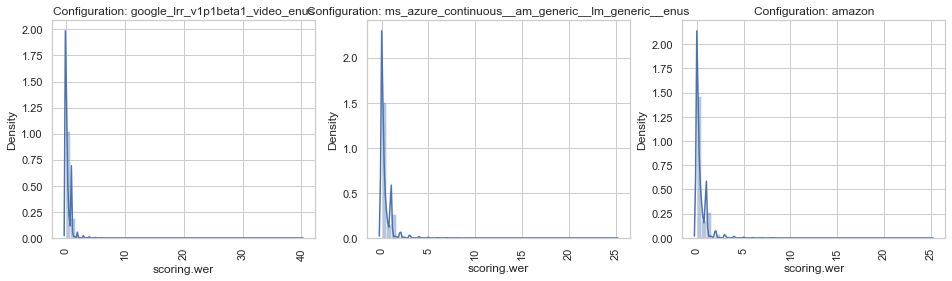

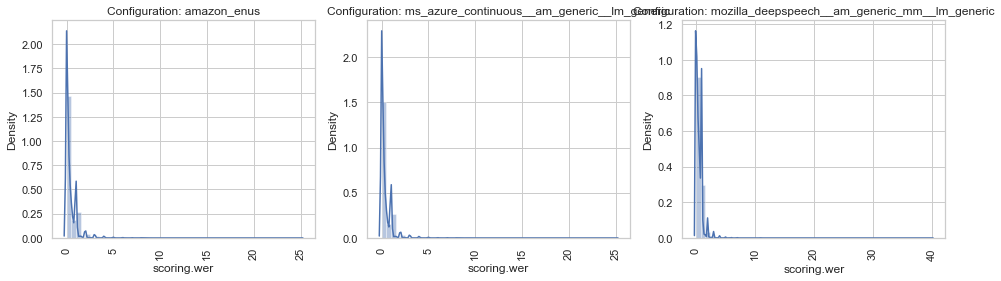

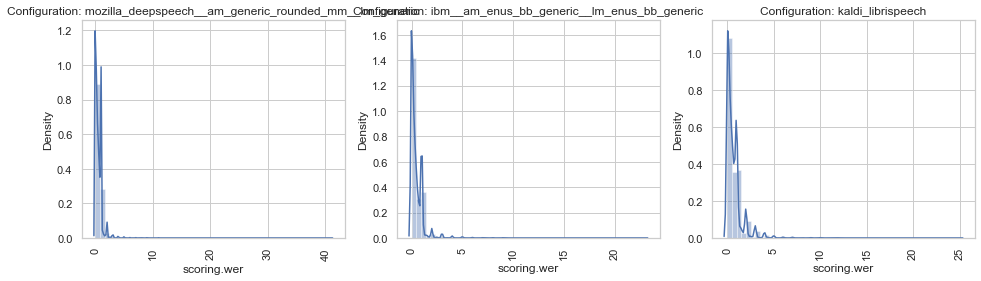

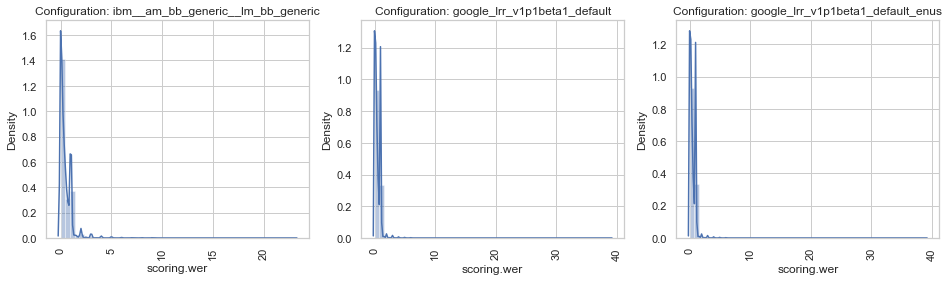

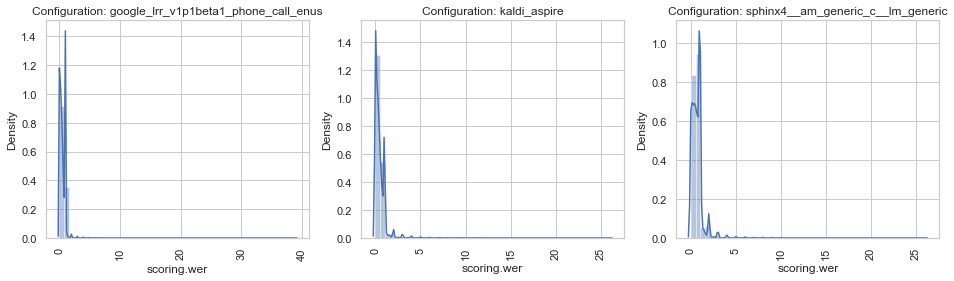

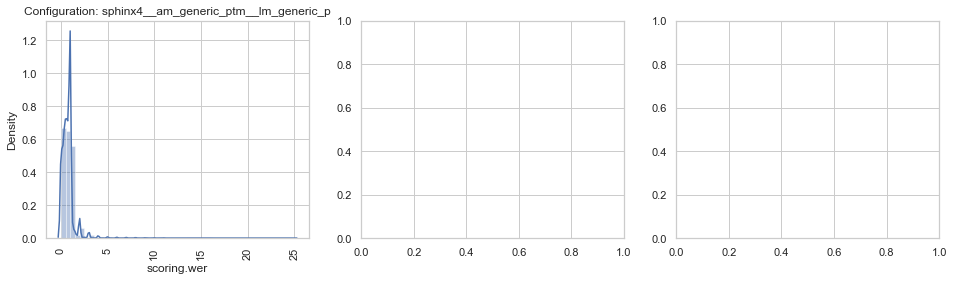

In [165]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plot_count = 0
for element in order:
    if plot_count % 3 == 0:
        ax_count = 0
        fig, axes = plt.subplots(figsize=(16,4), nrows=1, ncols=3)
        ax = sns.distplot(df[df['configuration']==element]["scoring.wer"], ax=axes[ax_count])
        ax.set_title("Configuration: " + element)
        ax.tick_params(axis='x', rotation=90)
        plot_count += 1
        ax_count += 1
    else:
        ax = sns.distplot(df[df['configuration']==element]["scoring.wer"], ax=axes[ax_count])
        ax.set_title("Configuration: " + element)
        ax.tick_params(axis='x', rotation=90)
        plot_count += 1
        ax_count += 1

# Exploratory - only_non_lexical_sounds = True
- Non-lexical conversational sounds. Sounds like h-nmm, hh-aaaah, hn-hn, unkay, nyeah, ummum, uuh, um-hm-uh-hm, um and uh-huh

In [166]:
# Non-lexical sounds by corpus
non_lexical = df[(df['reference.only_non_lexical_sounds'] == True)]
print('Total non lexical rows: ',len(non_lexical))
non_lexical.groupby(['corpus'])['reference.only_non_lexical_sounds'].count()

Total non lexical rows:  54208


corpus
ami_segmented_h          10976
ami_segmented_mix        10912
rt_segmented_h            9600
rt_segmented_hsum         9600
switchboard_segmented    13120
Name: reference.only_non_lexical_sounds, dtype: int64

In [167]:
# Non-lexical sounds by corpus and machine
non_lexical = df[(df['reference.only_non_lexical_sounds'] == True)]
non_lexical.groupby(['corpus','machine'])['reference.only_non_lexical_sounds'].count()

corpus                 machine
ami_segmented_h        amazon     1372
                       google     2744
                       ibm        1372
                       kaldi      1372
                       mozilla    1372
                       ms         1372
                       sphinx4    1372
ami_segmented_mix      amazon     1364
                       google     2728
                       ibm        1364
                       kaldi      1364
                       mozilla    1364
                       ms         1364
                       sphinx4    1364
rt_segmented_h         amazon     1200
                       google     2400
                       ibm        1200
                       kaldi      1200
                       mozilla    1200
                       ms         1200
                       sphinx4    1200
rt_segmented_hsum      amazon     1200
                       google     2400
                       ibm        1200
                       kaldi     

In [168]:
# Non-lexical texts
non_lexical['reference.text'].value_counts()

yeah                         24592
mm                            5392
mhm                           3744
uh-huh                        3744
um-hum                        2960
um                            2128
oh                            1952
yeah yeah                     1552
hmm                           1376
hm                            1104
uh                            1056
ah                             672
oh yeah                        544
huh                            400
eh                             352
yeah yeah yeah                 320
mhm mhm                        224
um-hum um-hum                  208
mm yeah                        192
uh-huh uh-huh                  176
mm mm                          160
uh yeah                        128
mhm yeah                        64
oh yeah yeah                    64
yeah yeah yeah yeah             64
yeah mm                         64
um-hum um-hum um-hum            64
ah yeah                         64
yeah uh             

# Special characters - do references contain any?
- why does thre reference still have characters like ":", '"'.? 
- In cases like **REF**:"presently" his water brother said breathlessly, **HYP**:presently his water brother said breathlessly, the scoring wer (0.166667) is missleading, it should be 0. 
- We will clean these and recompute the WER.

In [169]:
from functions import check_special_characters

cols = ['identifier', 'file', 'reference.text', 'hypothesis.text', 'scoring.wer']
df_special_characters_reference = check_special_characters(df, 'reference.text')[cols]
df_special_characters_reference.shape

/Users/traceyetheridge/anaconda3/envs/spinning_bytes/lib/python3.8/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(7376, 5)

In [170]:
df_special_characters_reference

,identifier,file,reference.text,hypothesis.text,scoring.wer
139,sw3288B-ms98-a-0058,amazon__8000_8__switchboard_segmented.json,well yeah i guess um you know unless you're um...,well yeah i guess um you know unless you're um...,0.125000
274,sw2604B-ms98-a-0016,amazon__8000_8__switchboard_segmented.json,it's something i[t's] it's since since we live...,that's something since since we live here and ...,0.170213
445,sw3681B-ms98-a-0023,amazon__8000_8__switchboard_segmented.json,oh well now ye[s-],oh well now you,0.250000
931,sw3130B-ms98-a-0031,amazon__8000_8__switchboard_segmented.json,you['ll] you'll you know you'll go two weeks w...,you'll you know it you'll go two weeks without...,0.071429
1384,sw2916A-ms98-a-0044,amazon__8000_8__switchboard_segmented.json,anyway there was this whole book that came out...,anyway there was this whole book that came out...,0.068966
...,...,...,...,...,...
1001,JMG0_SI1811,sphinx4__am_generic_ptm__lm_generic_p__timit.json,"""presently"" his water brother said breathlessly",presently his wire brenner said breathlessly,0.500000
1244,MAF0_SI829,sphinx4__am_generic_ptm__lm_generic_p__timit.json,what it does: stimulates rumen activity,within the us stimulates rehman activity,0.666667
1515,WJG0_SI1754,sphinx4__am_generic_ptm__lm_generic_p__timit.json,he said: the crazy fool half aloud,he said crazy fool apple,0.571429
1673,KMS0_SI860,sphinx4__am_generic_ptm__lm_generic_p__timit.json,these include: leaves of absences illnesses an...,these include leaves of absences bonuses and l...,0.375000


In [172]:
df_special_characters_reference.to_csv('../data/df_special_characters_reference.csv')

# References with less than 5 words
- How many are they?

In [173]:
df_clean_5words = df[df['reference.text'].apply(lambda x: x.count(" ") >= 4)]
df_clean_4words = df[df['reference.text'].apply(lambda x: x.count(" ") >= 3)]
df_clean_3words = df[df['reference.text'].apply(lambda x: x.count(" ") >= 2)]
print('references with less than 5 words:', (df.shape[0] - df_clean_5words.shape[0]) / df.shape[0])
print('references with less than 4 words:', (df.shape[0] - df_clean_4words.shape[0]) / df.shape[0])
print('references with less than 3 words:', (df.shape[0] - df_clean_3words.shape[0]) / df.shape[0])

references with less than 5 words: 0.3178702835293269
references with less than 4 words: 0.2683308082629921
references with less than 3 words: 0.22788158622514007


# Upper cases in reference or hypothesis

In [174]:
# 135.808 times ref is uppercase. Important - wer is not affected
df[df['reference.text'].apply(lambda x: x.isupper()) == True][['identifier', 'file', 'reference.text', 'hypothesis.text', 'scoring.wer']]

# 37.849 times hyp is uppercase. Important - wer is not affected
df[df['hypothesis.text'].apply(lambda x: x.isupper()) == True][['identifier', 'file', 'reference.text', 'hypothesis.text', 'scoring.wer']]

,identifier,file,reference.text,hypothesis.text,scoring.wer
24,ES2010c_D_1037_312,ibm__am_bb_generic__lm_bb_generic__ami_segment...,two double a_s,EE,1.0
1272,EN2009b_B_993_168,ibm__am_bb_generic__lm_bb_generic__ami_segment...,the c_v_s_,CVS,1.0
3519,TS3008d_C_2212_246,ibm__am_bb_generic__lm_bb_generic__ami_segment...,l_c_d_,LCD,1.0
3892,IB4010_D_1418_88,ibm__am_bb_generic__lm_bb_generic__ami_segment...,yeah,M.,1.0
4065,ES2010a_D_533_376,ibm__am_bb_generic__lm_bb_generic__ami_segment...,double a_,EE,1.0
...,...,...,...,...,...
5136,EDI_20071128_1000_h01_spkr1_1605_70766639,ms_azure_continuous__am_generic__lm_generic__r...,okay,OK,1.0
5148,EDI_20071128_1000_h01_spkr1_1633_07919124,ms_azure_continuous__am_generic__lm_generic__r...,~u i,UA,1.0
5267,EDI_20071128_1000_h03_spkr3_1859_69832402,ms_azure_continuous__am_generic__lm_generic__r...,okay,OK,1.0
5317,EDI_20071128_1000_h01_spkr1_1975_0336984,ms_azure_continuous__am_generic__lm_generic__r...,okay,OK,1.0


# Other

- What is 'overlappings'
- What is 'speaker_noise_utterance'

In [175]:
df['overlappings'].value_counts()

0.0    348976
1.0    204720
2.0     81888
3.0     27216
4.0      2336
5.0       192
Name: overlappings, dtype: int64

In [176]:
df[df['overlappings']==4]

,identifier,speaker_id,dialect,accent,gender,overlappings,speaker_noise_utterance,speaking_rate,reference.text,reference.original_text,reference.only_non_lexical_sounds,reference.start_time,reference.end_time,audio.trimmed_audio,audio.audio_file_path,audio.duration,audio.samplerate,audio.bitdepth,audio.channels,audio.encoding,audio.num_samples,recording.acoustic_environment,recording.recording_device,hypothesis.text,hypothesis.original_transcript,hypothesis.confidence,hypothesis.transcription_language,hypothesis.words,scoring.wer,scoring.alignment.SUBSTITUTION.abs,scoring.alignment.SUBSTITUTION.rel,scoring.alignment.DELETION.abs,scoring.alignment.DELETION.rel,scoring.alignment.INSERTION.abs,scoring.alignment.INSERTION.rel,scoring.alignment.CORRECT.abs,scoring.alignment.CORRECT.rel,scoring.alignment.mutations,extra.age,extra.network,extra.region,extra.mother_tongue,extra.date_of_birth,extra.primary_school,extra.education,corpus,machine,configuration,file
7,NIST_20080201_1405_HM_01_Subj_253_16k16b_1626_...,Subj-253,None,native,female,4.0,False,151.906725,people are always bad with r s v p,People are always bad with ~R ~S ~V ~P.,False,1626.35,1629.9,/home/fg/asr/cache/audio/701e5f1e899e2473971e3...,/home/fg/asr/corpora/rt/RT09_complete/audio/ev...,3.554813,16000,16,1,Signed Integer PCM,56877,None,h,people are always bad with ours,people are always bad with ours.,None,en-US,"[{'start_time': 0.1, 'end_time': 0.55, 'extra'...",0.444444,1,0.111111,3,0.333333,0,0.0,5,0.555556,"[[CORRECT, people, people], [CORRECT, are, are...",None,None,None,None,None,None,None,rt_segmented_h,amazon,amazon,amazon__rt_segmented_h.json
8,NIST_20080201_1405_HM_05_Subj_257_16k16b_1626_...,Subj-257,None,native,female,4.0,False,173.868946,most people do not respond to r s v p,Most people do not respond to ~R ~S ~V ~P.,False,1626.37,1629.82,/home/fg/asr/cache/audio/2420eca36c122d2f916c7...,/home/fg/asr/corpora/rt/RT09_complete/audio/ev...,3.450875,16000,16,1,Signed Integer PCM,55214,None,h,most people do not respond to our escapees,most people do not respond to our escapees.,None,en-US,"[{'start_time': 0.0, 'end_time': 0.41, 'extra'...",0.400000,2,0.200000,2,0.200000,0,0.0,6,0.600000,"[[CORRECT, most, most], [CORRECT, people, peop...",None,None,None,None,None,None,None,rt_segmented_h,amazon,amazon,amazon__rt_segmented_h.json
9,NIST_20080201_1405_HM_02_Subj_254_16k16b_1628_...,Subj-254,None,native,female,4.0,False,134.359692,oh no,Oh no.,False,1628.73,1629.62,/home/fg/asr/cache/audio/571daceda0aedc961fd01...,/home/fg/asr/corpora/rt/RT09_complete/audio/ev...,0.893125,16000,16,1,Signed Integer PCM,14290,None,h,no no,"No, no.",None,en-US,"[{'start_time': 0.07, 'end_time': 0.22, 'extra...",0.500000,1,0.500000,0,0.000000,0,0.0,1,0.500000,"[[SUBSTITUTION, oh, no], [CORRECT, no, no]]",None,None,None,None,None,None,None,rt_segmented_h,amazon,amazon,amazon__rt_segmented_h.json
10,NIST_20080201_1405_HM_03_Subj_255_16k16b_1628_...,Subj-255,None,native,female,4.0,False,64.407951,anyway,Anyway.,False,1628.75,1629.68,/home/fg/asr/cache/audio/5e5530bfd838fd3861e98...,/home/fg/asr/corpora/rt/RT09_complete/audio/ev...,0.931562,16000,16,1,Signed Integer PCM,14905,None,h,anyway,anyway.,None,en-US,"[{'start_time': 0.07, 'end_time': 0.75, 'extra...",0.000000,0,0.000000,0,0.000000,0,0.0,1,1.000000,"[[CORRECT, anyway, anyway]]",None,None,None,None,None,None,None,rt_segmented_h,amazon,amazon,amazon__rt_segmented_h.json
11,NIST_20080201_1405_HM_04_Subj_256_16k16b_1629_...,Subj-256,None,native,female,4.0,False,136.112293,i know,I know.,False,1629.5,1630.38,/home/fg/asr/cache/audio/d085cbdf730366faed839...,/home/fg/asr/corpora/rt/RT09_complete/audio/ev...,0.881625,16000,16,1,Signed Integer PCM,14106,None,h,i know,I know.,None,en-US,"[{'start_time': 0.06, 'end_time': 0.18, 'extra...",0.000000,0,0.000000,0,0.000000,0,0.0,2,1.000000,"[[CORRECT, i, i], [CORRECT, know, know]]",None,None,None,None,None,None,None,rt_segmented_h,amazon,amazon,amazon__rt_segmented_h.json
...,...,...,...,...,...

In [177]:
df['speaker_noise_utterance'].value_counts()

False    647248
True      18080
Name: speaker_noise_utterance, dtype: int64

In [178]:
df[df['speaker_noise_utterance'] == True]

,identifier,speaker_id,dialect,accent,gender,overlappings,speaker_noise_utterance,speaking_rate,reference.text,reference.original_text,reference.only_non_lexical_sounds,reference.start_time,reference.end_time,audio.trimmed_audio,audio.audio_file_path,audio.duration,audio.samplerate,audio.bitdepth,audio.channels,audio.encoding,audio.num_samples,recording.acoustic_environment,recording.recording_device,hypothesis.text,hypothesis.original_transcript,hypothesis.confidence,hypothesis.transcription_language,hypothesis.words,scoring.wer,scoring.alignment.SUBSTITUTION.abs,scoring.alignment.SUBSTITUTION.rel,scoring.alignment.DELETION.abs,scoring.alignment.DELETION.rel,scoring.alignment.INSERTION.abs,scoring.alignment.INSERTION.rel,scoring.alignment.CORRECT.abs,scoring.alignment.CORRECT.rel,scoring.alignment.mutations,extra.age,extra.network,extra.region,extra.mother_tongue,extra.date_of_birth,extra.primary_school,extra.education,corpus,machine,configuration,file
8,IS1003a_C_606_8,MIO005,None,non_native,male,3.0,True,34.722222,,laugh,False,606.8,608.528,/home/fg/asr/cache/audio/3da2bdecdcbe5c6ed9127...,/home/fg/asr/corpora/ami/amicorpus/IS1003a/aud...,1.728000,16000,16,1,Signed Integer PCM,27648,None,Headset,hey,Hey!,None,en-US,"[{'start_time': 0.0, 'end_time': 0.3, 'extra':...",1.0,0,0.0,0,0.0,1,1.0,0,0.0,"[[INSERTION, , hey]]",None,None,None,None,None,None,None,ami_segmented_h,amazon,amazon,amazon__ami_segmented_h.json
16,TS3005a_C_1216_72,MTD018ID,None,non_native,male,2.0,True,36.407767,,laugh,False,1216.72,1218.37,/home/fg/asr/cache/audio/3183c3509af109868a415...,/home/fg/asr/corpora/ami/amicorpus/TS3005a/aud...,1.648000,16000,16,1,Signed Integer PCM,26368,None,Headset,no,no.,None,en-US,"[{'start_time': 0.08, 'end_time': 0.15, 'extra...",1.0,0,0.0,0,0.0,1,1.0,0,0.0,"[[INSERTION, , no]]",None,None,None,None,None,None,None,ami_segmented_h,amazon,amazon,amazon__ami_segmented_h.json
18,IN1013_B_1966_613,MIO078,None,non_native,male,1.0,True,133.928571,,other,False,1966.61,1967.06,/home/fg/asr/cache/audio/20ccc0cfca58db246da4f...,/home/fg/asr/corpora/ami/amicorpus/IN1013/audi...,0.448000,16000,16,1,Signed Integer PCM,7168,None,Headset,again,again.,None,en-US,"[{'start_time': 0.0, 'end_time': 0.44, 'extra'...",1.0,0,0.0,0,0.0,1,1.0,0,0.0,"[[INSERTION, , again]]",None,None,None,None,None,None,None,ami_segmented_h,amazon,amazon,amazon__ami_segmented_h.json
46,ES2012c_B_1204_616,FEE046,en-US,native,female,1.0,True,41.724618,,laugh,False,1204.62,1206.05,/home/fg/asr/cache/audio/007d496ee13837a4f4566...,/home/fg/asr/corpora/ami/amicorpus/ES2012c/aud...,1.438000,16000,16,1,Signed Integer PCM,23008,None,Headset,,,None,en-US,[],0.0,0,0.0,0,0.0,0,0.0,0,0.0,[],None,None,None,None,None,None,None,ami_segmented_h,amazon,amazon,amazon__ami_segmented_h.json
60,TS3008d_C_1218_102,MTD030ID,None,non_native,male,2.0,True,132.158590,,laugh,False,1218.1,1218.56,/home/fg/asr/cache/audio/61bed7ec03e6fe35c7da8...,/home/fg/asr/corpora/ami/amicorpus/TS3008d/aud...,0.454000,16000,16,1,Signed Integer PCM,7264,None,Headset,,,None,en-US,[],0.0,0,0.0,0,0.0,0,0.0,0,0.0,[],None,None,None,None,None,None,None,ami_segmented_h,amazon,amazon,amazon__ami_segmented_h.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,EDI_20071128_1500_h02_spkr2_2044_52307979,spkr2,None,non_native,male,1.0,True,76.232876,,{laugh},False,2044.52,2045.31,/home/fg/asr/cache/audio/317b6e0a9df9b21a918ce...,/home/fg/asr/corpora/rt/RT09_complete/audio/ev...,0.787062,16000,16,1,Signed Integer PCM,12593,None,hsum,salem,None,None,None,"[{'start_time': 0.22, 'end_time': 0.76, 'alter...",1.0,0,0.0,0,0.0,1,1.0,0,0.0,"[[INSERTION, , salem]]",None,None,None,None,None,None,None,rt_segmented_hsum,sphinx4,sphinx4__am_generic_ptm__lm_generic_p,sphinx4__am_generic_ptm__lm_generic_p__rt_segm...
2665,EDI_20071128_1500_h02_spkr2_2235_06996269,spkr2,None,non_native

In [179]:
df[((df['speaker_noise_utterance'] == True) & (df['reference.text'] != ""))]

,identifier,speaker_id,dialect,accent,gender,overlappings,speaker_noise_utterance,speaking_rate,reference.text,reference.original_text,reference.only_non_lexical_sounds,reference.start_time,reference.end_time,audio.trimmed_audio,audio.audio_file_path,audio.duration,audio.samplerate,audio.bitdepth,audio.channels,audio.encoding,audio.num_samples,recording.acoustic_environment,recording.recording_device,hypothesis.text,hypothesis.original_transcript,hypothesis.confidence,hypothesis.transcription_language,hypothesis.words,scoring.wer,scoring.alignment.SUBSTITUTION.abs,scoring.alignment.SUBSTITUTION.rel,scoring.alignment.DELETION.abs,scoring.alignment.DELETION.rel,scoring.alignment.INSERTION.abs,scoring.alignment.INSERTION.rel,scoring.alignment.CORRECT.abs,scoring.alignment.CORRECT.rel,scoring.alignment.mutations,extra.age,extra.network,extra.region,extra.mother_tongue,extra.date_of_birth,extra.primary_school,extra.education,corpus,machine,configuration,file
